___
# Atividade: Teoria da Probabilidade
___

## Aula 08

**Referência de Leitura:**
1. Magalhães e Lima (7ª. Edição): pág. 49 a 68 - Probabilidades

**Hoje:**
1. Conceito de Probabilidade
4. Probabilidade Condicional
3. Independência de eventos
5. Teorema de Bayes. Simulação do problema de Monty Hall

**Próxima aula:**
1. Magalhães e Lima (7ª. Edição): pág. 69 a 104 - Variáveis aleatórias discretas
___

In [11]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

#Bibliotecas necessárias
import numpy as np
import random


## <font color='blue'>Exercício 1</font>

Monte a simulação de 1000 jogadas de um dado idôneo de 6 faces. Faça o histograma (normalizado) da frequência.

    a) Olhando o histograma, o que pode se dizer sobre as probabilidade de cada face?
    
    b) Discorra sobre o porque da probabilidade não ser exatamente igual à teórica.

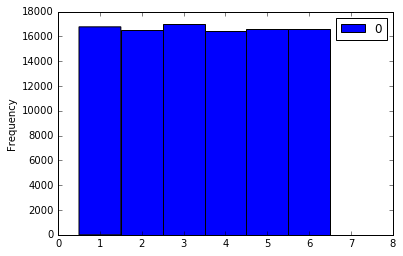

In [96]:
data = pd.DataFrame(np.random.randint(1,7,100000))

faixa =  np.arange(1,8,1)

variável= pd.cut(data, faixa)

faixa =  np.arange(0.5,8,1)

plot = data.plot.hist(bins=faixa)


b) porque a probabilidade não é perfeita, como estamos lidadondo com probabilidade o gráfico acima (muito provavelmente) vai ser cada vez que o codigo for rodado.

___
## <font color='blue'>Exercício 2</font>

Ampliando o espaço amostral para as possíveis jogadas de 2 dados, analise as seguintes situações:
    
    a) Jogando os dois dados ao mesmo tempo. Qual é a probabilidade de obter soma 7?
    
    b) Jogando um dado e depois o segundo dado. Qual é a probabilidade de obter soma 7 já sabendo o resultado do primeiro? Compare o resultado com item anterior! Por que é igual ou diferente?

In [97]:
x= 0
for i in range(1000):
    data1 = np.random.randint(1,7)
    data2 = np.random.randint(1,7)
    soma = data1 + data2
    if soma == 7:
        x += 1

print(x/1000)
print('a) a chance é igual a:',(6/36),'jogando dois dados ao mesmo tempo so existem 6 possibilidades da soma ser 7, em um espaço amostrar de 36',"""
      """)

print('b) a chance é igual a:',1/6,'porque já sabendo o resultado do primeiro dado só existe 1 número no segundo dado   que  somado ao  número tirado no primeiro dado será igual a 7')

0.163
a) a chance é igual a: 0.16666666666666666 jogando dois dados ao mesmo tempo so existem 7 possibilidades da soma ser 7, em um espaço amostrar de 36 
      
b) a chance é igual a: 0.16666666666666666 porque já sabendo o resultado do primeiro dado só existe 1 número no segundo dado   que  somado ao  número tirado no primeiro dado será igual a 7


___
## <font color='blue'>Exercício 3</font>

Simule 10000 vezes o problema de Monty Hall¹ , usar o seguinte algoritmo:


* Repetir 10000 vezes:
    * Sorteie um número de porta de 1 a 3 para ser a premiada
    * Sorteie um número de porta de 1 a 3 para ser a porta escolhida.
    * Sorteie um número de porta para ser a aberta, desde que não seja a premiada e nem a porta escolhida. Assim, se:
        * porta premiada é 1 e a escolhida é 1, sorteie entre as portas 2 e 3 para ser aberta
        * porta premiada é 1 e a escolhida é 2, com probabilidade 1 deve abrir a porta 3
        * porta premiada é 1 e a escolhida é 3, com probabilidade 1 deve abrir a porta 2
        * assim para demais casos...
    
    * Calcule quantas vezes indivíduo ganha ao trocar de porta. Ou seja, se:
        * porta premiada é 1, a escolhida é 1 e aberta é 2 (ou 3), indivíduo perde se trocar de porta
        * porta premiada é 1, a escolhida é 2 e aberta é 3, indivíduo ganha se trocar de porta
        * porta premiada é 1, a escolhida é 3 e aberta é 2, indivíduo ganha se trocar de porta
        * assim para demais casos...
        
    * Exibir quantas vezes em 10000, o indivíduo ganhou ao trocar de porta.

Compare o resultado numérico com o resultado analítico obtido via Teorema de Bayes.

¹https://en.wikipedia.org/wiki/Monty_Hall_problem e 
Exercício 1.4.5 de http://www.portalaction.com.br/probabilidades/14-eventos-independentes-e-probabilidade-condicional

In [50]:
# jeito porco

ganhou = 0
n = 10000

for x in range(n):
    premio = np.random.choice(3)
    escolhido = np.random.choice(3)
    aberto = np.random.choice(3)
    
    while aberto == premio or aberto == escolhido : #nota : jeito muito,muito,muito,muito,muito ruim de fazer isso
        aberto = np.random.choice(3) # mas pelo menos são só duas linhas
        
    troca = np.random.choice(3)
    while troca == escolhido or troca == aberto: #nota : jeito muito,muito,muito,muito,muito ruim de fazer isso
        troca = np.random.choice(3) # mas pelo menos são só duas linhas
        
    if troca == premio:
        ganhou += 1


print(ganhou/n)  

0.6742


In [37]:
print('resultado (quase) exato:',2/3)

resultado (quase) exato: 0.6666666666666666


In [99]:
#agora funciona para k portas

ganhou = 0
n = 10000 #número de vezes que o programa vai rodar
k = 3 #número de portas
Trade = True

if k<3 or isinstance(k, int) == False or isinstance(n, int)== False:
    print('impossivel')
else:

    for x in range(n):
        lista_ordenada = list(np.arange(1,k+1))
        lista = random.sample(lista_ordenada, len(lista_ordenada))
        listaC = list(lista) #uma copia da lista, é a lista das posiveis escolhas do competidor

        premio = random.sample(lista,1) # a porta que esta o premio
        escolhido = random.sample(listaC,1) # a porta que o jagador escolheu
        listaC.remove(escolhido) # o competidor escolhe uma porta, ela é iliminada da lista
        lista.remove(premio) # o apresentador nunca vai escolher o premio 
        
        try:
            lista.remove(escolhido) #daria erro se a escolha for igual ao premio, o 'try' "conserta"
        except:
            pass

        
            aberto = random.sample(lista,k-2) # abre a porta(ou portas), os elementos: premio e escolha foram apagados da lista,
        for i in aberto:# o apresentador nunca vai escolher eles.
            listaC.remove(i)# o competidor nunca vai trocar para a porta(s) que ja foi aberta

        if Trade == True:
            escolha = listaC # so tem uma escolha possivel

        if escolha == premio:
            ganhou += 1

    print((ganhou/n))#cuidado: o python arredonda, principalmente com muitas portas
print('total de ganhos: ',ganhou)
print('a chance de ganhar é: ',k-1,"/",k)

0.0
total de ganhos:  0
a chance de ganhar é:  2 / 3


In [34]:
print('resultado (quase) exato:',2/3)

resultado (quase) exato: 0.6666666666666666
